## 3.5.4　クラスタリングアルゴリズムの比較と評価

In [1]:
import mglearn
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (5, 5)

In [3]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

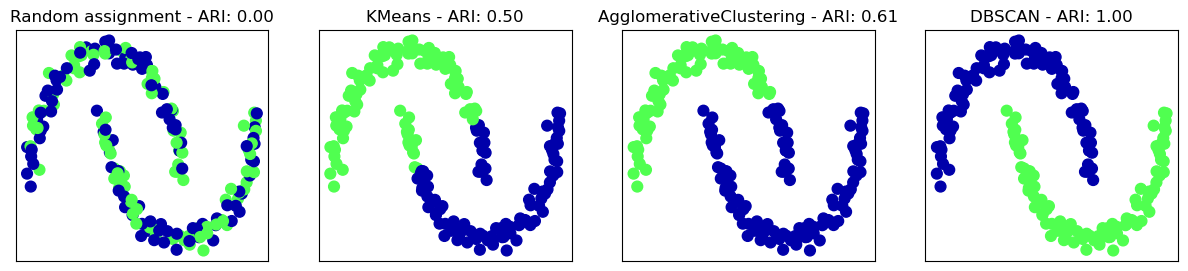

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [6]:
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


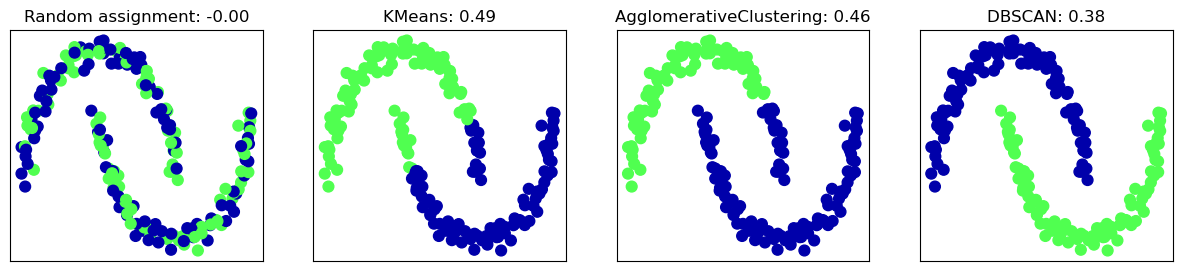

In [7]:
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{}: {:.2f}".format(algorithm.__class__.__name__,
                                     silhouette_score(X_scaled, clusters)))

In [8]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [9]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [10]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("unique labels: {}".format(np.unique(labels)))

unique labels: [-1]


In [11]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("unique labels: {}".format(np.unique(labels)))

unique labels: [-1]


In [12]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("unique labels: {}".format(np.unique(labels)))

unique labels: [-1  0]


In [13]:
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  37 2026]


In [14]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("eps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_pca)
    print("unique labels: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))

eps=1
unique labels: [-1]
Cluster sizes: [2063]
eps=3
unique labels: [-1]
Cluster sizes: [2063]
eps=5
unique labels: [-1]
Cluster sizes: [2063]
eps=7
unique labels: [-1  0  1]
Cluster sizes: [1994   58   11]
eps=9
unique labels: [-1  0  1]
Cluster sizes: [1215  844    4]
eps=11
unique labels: [-1  0]
Cluster sizes: [ 409 1654]
eps=13
unique labels: [-1  0]
Cluster sizes: [ 120 1943]


In [15]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [174 243 157 296 206 272 134 339   1 241]


In [16]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [ 56 101  94 140 154 596 269 178  61 414]


In [17]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


Text(0, 0.5, 'Cluster distance')

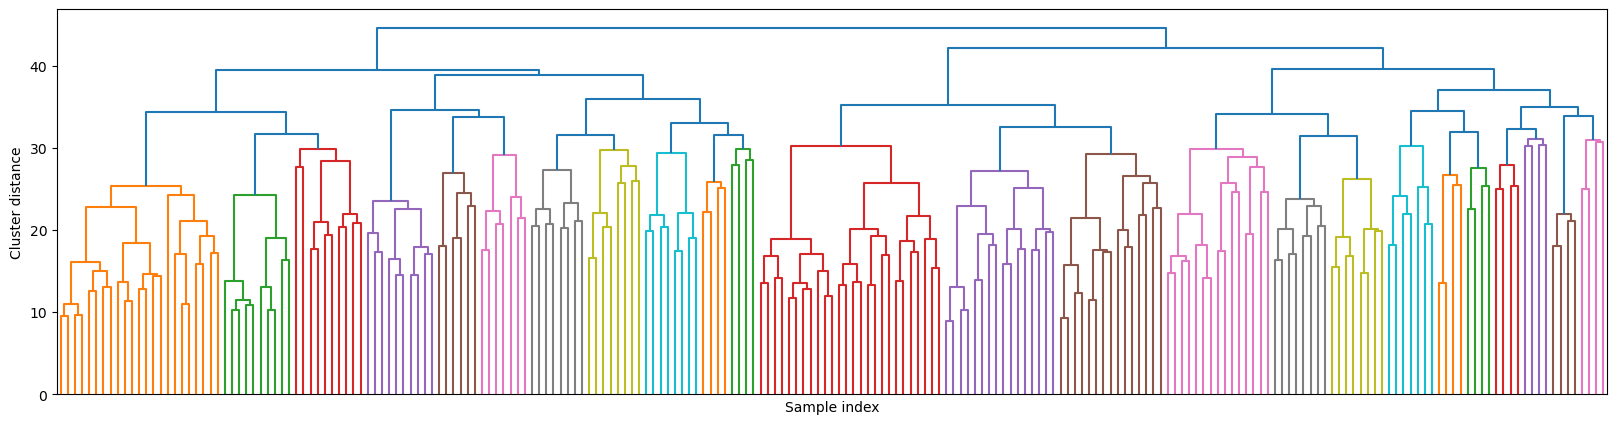

In [18]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [19]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [268 151  44 129  23  63  19 101 116  13  66 102  51  40  30   2  74  44
  25  29  11  19 135  15  20  19  44  84  50  21  31   6   8   8  38  48
  19  66  27   4]
